<a href="https://colab.research.google.com/github/Roshano1/GloBox-Pro/blob/main/Hypothesis_Testing_for_Conversion_Rate_between_the_two_groups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import statsmodels.api as sm

# Number of users and number of users who purchased for control group
n_control = 24343
x_control = 955

# Number of users and number of users who purchased for treatment group
n_treatment = 24600
x_treatment = 1139

# Conversion rates
conversion_rate_control = x_control / n_control
conversion_rate_treatment = x_treatment / n_treatment

# Perform hypothesis test using proportions z-test
z_score, p_value = sm.stats.proportions_ztest([x_control, x_treatment], [n_control, n_treatment], alternative='two-sided')

# Print results
print(f"Control Group Conversion Rate: {conversion_rate_control:.2%}")
print(f"Treatment Group Conversion Rate: {conversion_rate_treatment:.2%}")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the p-value is less than the significance level (e.g., 0.05) for hypothesis testing
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between the groups.")


Control Group Conversion Rate: 3.92%
Treatment Group Conversion Rate: 4.63%
Z-score: -3.8643
P-value: 0.0001
Reject the null hypothesis: There is a significant difference in conversion rates between the groups.


In [ ]:
import numpy as np
import statsmodels.api as sm

# Number of users and number of users who purchased for control group
n_control = 24343
x_control = 955

# Number of users and number of users who purchased for treatment group
n_treatment = 24600
x_treatment = 1139

# Conversion rates
conversion_rate_control = x_control / n_control
conversion_rate_treatment = x_treatment / n_treatment

# Calculate standard error for the difference in proportions
se_diff = np.sqrt((conversion_rate_control * (1 - conversion_rate_control) / n_control) +
                  (conversion_rate_treatment * (1 - conversion_rate_treatment) / n_treatment))

# Calculate the margin of error for a 95% confidence interval (z-score = 1.96)
margin_of_error = 1.96 * se_diff

# Calculate the lower and upper bounds of the confidence interval
confidence_interval_lower = (conversion_rate_treatment - conversion_rate_control) - margin_of_error
confidence_interval_upper = (conversion_rate_treatment - conversion_rate_control) + margin_of_error

# Print results in the desired format
print(f"Upper bound (p)\t{confidence_interval_upper:.4f}")
print(f"Lower bound (p)\t{confidence_interval_lower:.4f}")


Upper bound (p)	0.0107
Lower bound (p)	0.0035


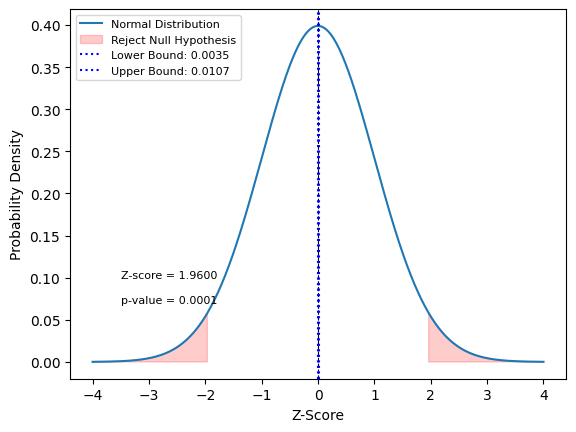

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given data
alpha = 0.05
z_score = 1.96
p_value = 0.0001
lower_bound = 0.0035
upper_bound = 0.0107

# Define horizontal values for the normal distribution
x = np.linspace(-4, 4, 500)

# Define vertical values using the normal distribution
pdf = norm.pdf(x, loc=0, scale=1)

# Plot the normal distribution
plt.plot(x, pdf, label='Normal Distribution')

# Shade the critical region for rejection of the null hypothesis (two-tailed test)
plt.fill_between(x, pdf, where=(x < -1.96) | (x > 1.96), color='red', alpha=0.2, label='Reject Null Hypothesis')

# Add labels and legend
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Mark the calculated z-score and p-value
plt.annotate(f'Z-score = {z_score:.4f}', xy=(-3.5, 0.1), fontsize=8)
plt.annotate(f'p-value = {p_value:.4f}', xy=(-3.5, 0.07), fontsize=8)

# Mark the lower and upper bounds of the confidence interval
plt.axvline(lower_bound, color='blue', linestyle=':', label=f'Lower Bound: {lower_bound:.4f}')
plt.axvline(upper_bound, color='blue', linestyle=':', label=f'Upper Bound: {upper_bound:.4f}')

# Add legend in the upper left corner
plt.legend(loc='upper left', fontsize=8)

# Show the plot
plt.show()